In [1]:
import pandas as pd
import numpy as np

from datetime import datetime




%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Explorative Data Analysis

* focus is often a visual representation of the data 


In [3]:
df_plot=pd.read_csv('../data/processed/COVID_table_for_dash.csv',sep=';')
df_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


# Matplotlib Example

<Figure size 1152x648 with 0 Axes>

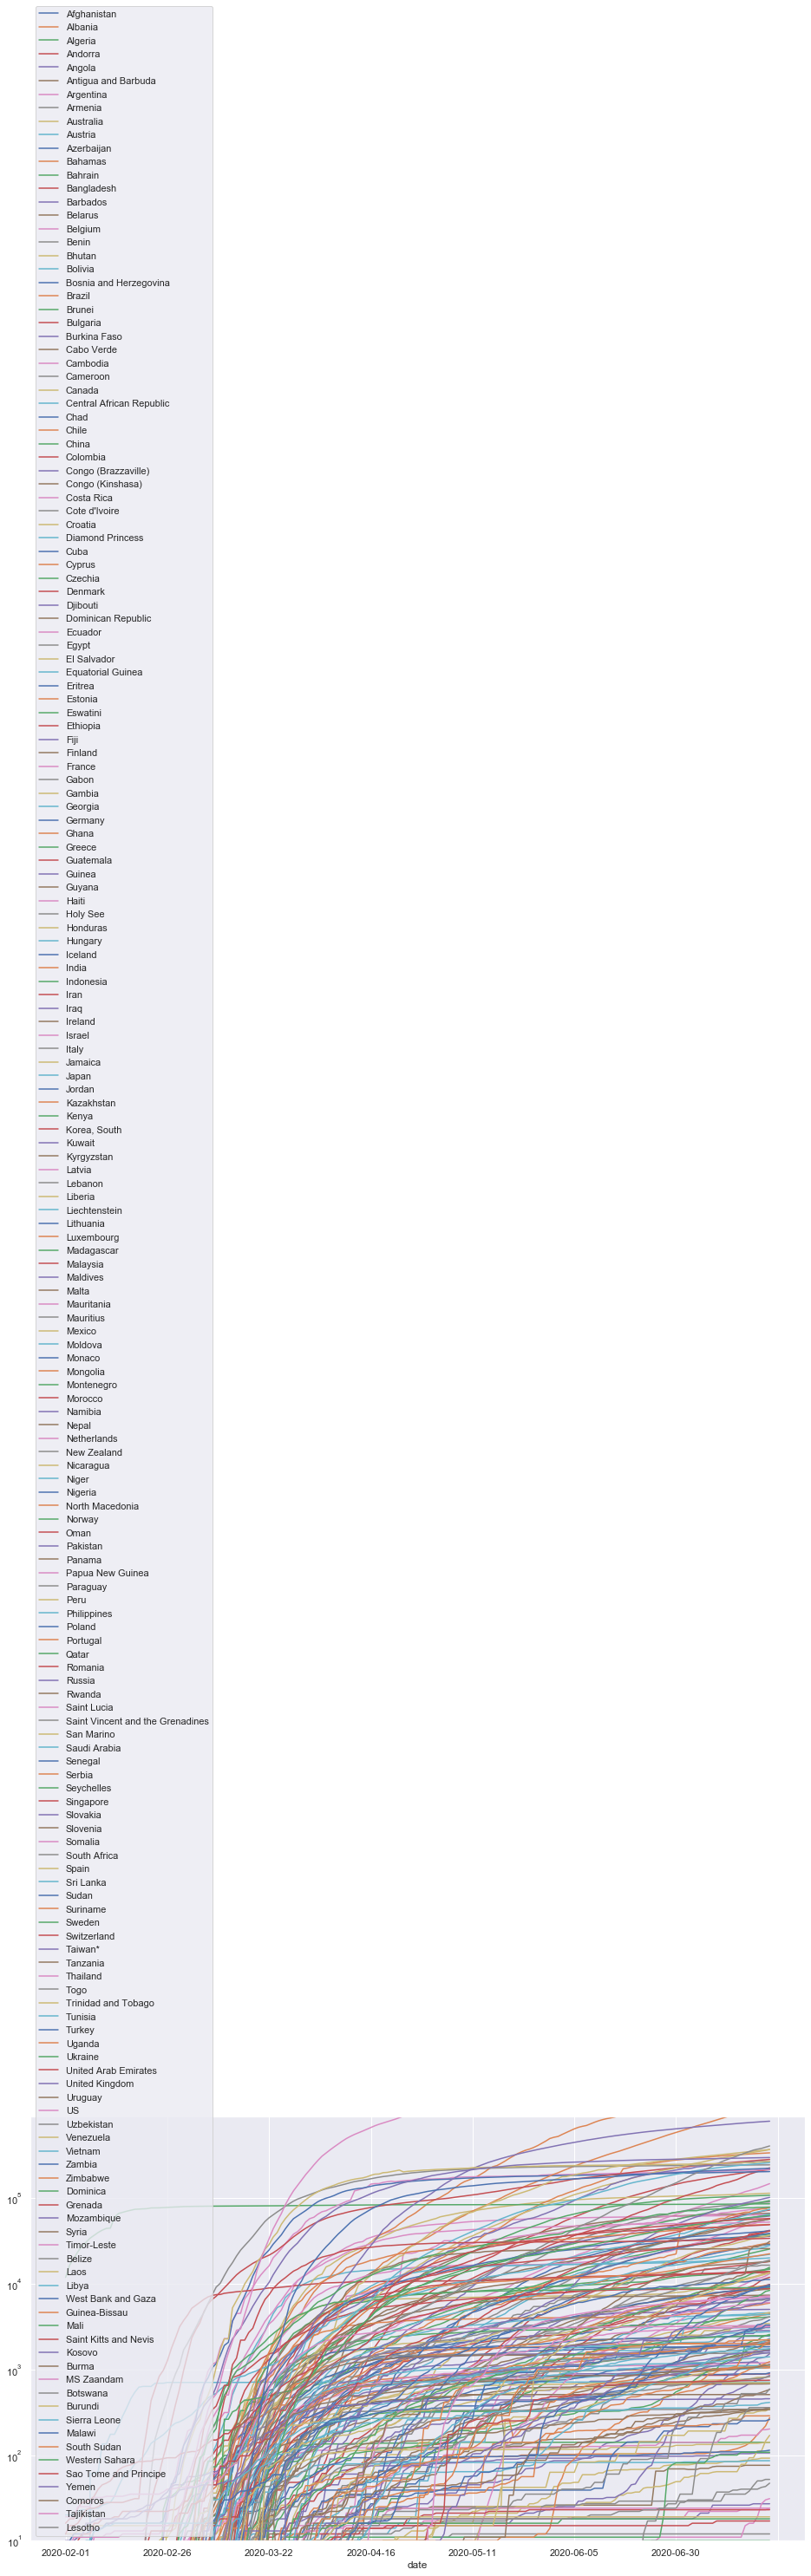

In [4]:
plt.figure();
ax=df_plot.iloc[10:,:].set_index('date').plot()
plt.ylim(10, 900000)   #range changed
ax.set_yscale('log')

# Plot.ly

In [5]:
import plotly.graph_objects as go

In [6]:
import plotly
plotly.__version__

'4.8.1'

In [7]:
country_list=df_plot.columns[1:].unique()
country_list

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Burundi', 'Sierra Leone', 'Malawi', 'South Sudan', 'Western Sahara',
       'Sao Tome and Principe', 'Yemen', 'Comoros', 'Tajikistan', 'Lesotho'],
      dtype='object', length=188)

In [8]:
fig = go.Figure()
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                                 )
                     )

## defines the overall layout properties
fig.update_layout(
    width=1000, ##1600,
    height=600, ##1200,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,6.5])    #changed range


fig.update_layout(xaxis_rangeslider_visible=True)
##fig.show(renderer='browser')      ##windows features on or off--> 
fig.show(renderer='notebook_connected')

In [9]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[{'label': each, 'value': each} for each in country_list],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])






In [10]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout':   
                dict (
                width=1280,
                height=720,
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                       'title':'Time'},
                        
                yaxis={'type':"log",
                       'range':'[1.1,5.5]',
                       'title':'Confirmed infected people (source johns hopkins csse, log-scale)'
                      }
                 
        )
    
    }

In [ ]:
# take care to press stop button befor calling once again, since address will be blocked (server up)
# if you have problems to find (kill) the process, use the following cmd commands (Linux)
# sudo lsof -n -i :8050 | grep LISTEN 
# kill -9 pid 

app.run_server(debug=True, use_reloader=False)

Running on http://127.0.0.1:8050/
Debugger PIN: 640-849-267
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
